In [23]:
import json
import pandas as pd
import os
from utils import Notice, compare_notice
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

with open("data/database/database.json", "r") as f : 
    db = json.load(f)

df = pd.DataFrame(db.values())

def get_notice_from_sourceUid(sourceUid, df = df): 
    if not isinstance(sourceUid, str) : 
        sourceUid = str(sourceUid)
    n_serie = df[df.sourceUid == sourceUid]
    t = n_serie.T.to_json()
    t_json = list(json.loads(t).values())[0]
    return t_json

def vectorize(sourceUid1, sourceUid2, df = df) : 
    notice1 = get_notice_from_sourceUid(sourceUid1, df)
    notice2 = get_notice_from_sourceUid(sourceUid2, df)
    d = compare_notice(notice1, notice2)
    return d

path = "data/test-data/"
files = os.listdir(path)
for file in files : 
        test = pd.read_csv(path + file, encoding = "utf8", sep = "\t")
        
        arr = []
        for x,y in zip(test.sourceUid1, test.sourceUid2) : 
                arr.append(vectorize(x, y))

        assert len(arr) == len(test)
        test_df = pd.DataFrame(arr)

        y_test = test['validation manuelle']
        y_pred = test_df

        print(file)
        print(precision_score(y_test, y_pred))
        print(recall_score(y_test, y_pred))
        print(f1_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print()

ImportError: cannot import name 'Notice' from 'utils' (/home/dago/Documents/TDM/sprint-5/co-near_dup/utils.py)

In [9]:
test = pd.read_csv(path + files[0], encoding = "utf8", sep = "\t")
arr = []
for x,y in zip(test.sourceUid1, test.sourceUid2) : 
    arr.append(vectorize(x, y))


In [6]:
set([x for x in df.typeConditor])

{'Article', 'Autre', 'Chapitre', 'Conférence', 'Ouvrage', 'Rapport', 'Thèse'}

In [55]:
from utils import getSettlement

source1 = "hal$halshs-02196766"
source2 = "hal$halshs-02155572"
t = get_notice_from_sourceUid(source2)
print(t["title"]["default"])
print(t["documentType"])
print(t["doi"])
getSettlement(t["teiBlob"])

The Role of Reputation and Competition on the Nature of Lies in Financial Markets
['COMM']
None


<meeting>
<title>EWEBE 2019, European Workshop on Experimental and Behavioral Economics</title>
<date type="start">2019-06-17</date>
<date type="end">2019-06-18</date>
<settlement>Ecully</settlement>
<country key="FR">France</country>
</meeting>

In [1]:
import os
import json
import pandas as pd
from config import ratio
from utils import NoticeComparison, compare_notice

with open("data/database/database.json", "r") as f : 
    db = json.load(f)

df = pd.DataFrame(db.values())


path = "data/test-data/"
files = os.listdir(path)
for file in files : 
    test = pd.read_csv(path + file, encoding = "utf8", sep = "\t")
    
    comp = NoticeComparison(test.sourceUid1, test.sourceUid2, df,  ratio)
    comp.compare_notice()
    y_test = test['validation manuelle']
    stats = comp.get_stats(y_test)

    print(file)
    print(stats)
    print()

KeyError: ''

In [3]:
i = 0
test = pd.read_csv(path + files[i], encoding = "utf8", sep = "\t")

print(files[i])
comp = NoticeComparison(test.sourceUid1, test.sourceUid2, df)
comp.compare_notice()

doublons-incertains-autres.tsv


In [3]:
test.shape

(138, 4)

In [4]:
print(file)
test_df = pd.DataFrame(comp.file)
test_df.to_csv("test.tsv", sep = "\t")

doublons-incertains.tsv


In [92]:
from utils import get_notice_from_sourceUid, getSettlement, Notice
s1 = "pubmed$26880373"
s2 = "hal$hal-01482499"

t1 = get_notice_from_sourceUid(s1, df)
t11 = Notice(t1)

t2 = get_notice_from_sourceUid(s2, df)
t22 = Notice(t2)
#set1 = getSettlement(t["teiBlob"])

In [9]:
t1 = get_notice_from_sourceUid(s2, df)
set2 = getSettlement(t["teiBlob"])

In [102]:
#from utils import compare_settlement

compare_notice(t11, t11)

{'default_title': [0.9, 1],
 'doi': [0.9, 1],
 'eissn': [0.9, 1],
 'issn': [0.1, 1],
 'meeting': [0.1, 1],
 'settlement': [0.1, 1],
 'issue': [0.1, 1],
 'page_range': [0.1, 1]}

In [99]:
keys = t11.__dict__.keys()
for key in keys :
    #if key != "teiBlob":
    print(key)
    print(getattr(t11, key))
    print(getattr(t11, key)) 
    print()


doi
10.1186/s13063-016-1211-x
10.1186/s13063-016-1211-x

default_title
Reduction of self-perceived discomforts in critically ill patients in French intensive care units: study protocol for a cluster-randomized controlled trial.
Reduction of self-perceived discomforts in critically ill patients in French intensive care units: study protocol for a cluster-randomized controlled trial.

meeting



journal
Trials
Trials

publi_date
2016-02-16
2016-02-16

page_range
87
87

issue
None
None

source
pubmed
pubmed

doc_type
Journal Article
Journal Article

issn
[]
[]

eissn
['1745-6215']
['1745-6215']

nnt
None
None

settlement
None
None

pii
10.1186/s13063-016-1211-x
10.1186/s13063-016-1211-x

volume
17
17

type_conditor
Article
Article

sourceUid
pubmed$26880373
pubmed$26880373



In [101]:
from utils import checkPR

checkPR(87,87)

#print(set1)
#print()
#print(set2)

[0.9, 1]

In [27]:
dd = pd.read_csv("score.csv")
dd

,Unnamed: 0,Precision,Recall,f1_score,confusion_matrix
0,0,0.000000,0.000000,0.000000,[[130 0]\n [ 8 0]]
1,1,0.000000,0.000000,0.000000,[[219 0]\n [ 45 0]]
2,2,0.000000,0.000000,0.000000,[[212 0]\n [ 51 0]]
3,3,0.000000,0.000000,0.000000,[[102 0]\n [ 48 0]]
4,4,0.000000,0.000000,0.000000,[[130 0]\n [ 8 0]]
5,5,0.000000,0.000000,0.000000,[[219 0]\n [ 45 0]]
6,6,0.000000,0.000000,0.000000,[[212 0]\n [ 51 0]]
7,7,0.000000,0.000000,0.000000,[[102 0]\n [ 48 0]]
8,8,0.000000,0.000000,0.000000,[[130 0]\n [ 8 0]]
9,9,0.000000,0.000000,0.000000,[[219 0]\n [ 45 0]]


In [30]:
import pandas as pd 
id0 = dd.loc[list(range(0,43, 4))]
id1 = dd.loc[list(range(1,43, 4))]
id2 = dd.loc[list(range(2,43, 4))]
id3 = dd.loc[list(range(3,43, 4))]

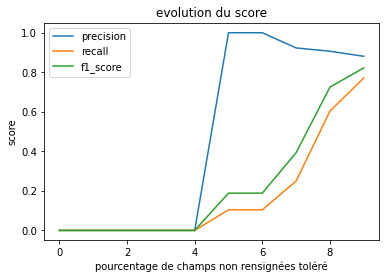

In [82]:
import matplotlib.pyplot as plt

plt.plot(list(id3.Precision))
plt.plot(list(id3.Recall))
plt.plot(list(id3.f1_score))
plt.legend(['precision', "recall", "f1_score"])
#plt.plot(id2.f1_score)
#plt.xlim([0,1])
plt.title("evolution du score")
plt.xlabel("pourcentage de champs non rensignées toléré")
plt.ylabel("score")
plt.show()

In [61]:
len(id3)

10

In [21]:
t1

{'hasDoi': False,
 'sourceId': 'hal-00987753',
 'documentType': ['UNDEFINED'],
 'researcherId': [],
 'teiBlob': 'PD94bWwgdmVyc2lvbj0iMS4wIj8+CjxURUkgeG1sbnM9Imh0dHA6Ly93d3cudGVpLWMub3JnL25zLzEuMCIgeG1sbnM6eHNpPSJodHRwOi8vd3d3LnczLm9yZy8yMDAxL1hNTFNjaGVtYS1pbnN0YW5jZSI+CiAgPHRleHQ+CiAgICA8Ym9keT4KICAgICAgPGxpc3RCaWJsPgogICAgICAgIDxiaWJsRnVsbD4KICAgICAgICAgIDx0aXRsZVN0bXQ+CiAgICAgICAgICAgIDx0aXRsZSB4bWw6bGFuZz0iZW4iPlJlbWFya3Mgb24gZXhpc3RlbmNlIGFuZCB1bmlxdWVuZXNzIG9mIENvdXJub3QtTmFzaCBlcXVpbGlicmlhIGluIHRoZSBub24tcG90ZW50aWFsIGNhc2U8L3RpdGxlPgogICAgICAgICAgPC90aXRsZVN0bXQ+CiAgICAgICAgICA8ZWRpdGlvblN0bXQ+CiAgICAgICAgICAgIDxlZGl0aW9uIG49InYxLjAuMCI+CiAgICAgICAgICAgICAgPGRhdGUgdHlwZT0id2hlbkRvd25sb2FkZWQiPjIwMjAtMDEtMDlUMTU6Mzc6MjgrMDE6MDA8L2RhdGU+CiAgICAgICAgICAgICAgPGRhdGUgdHlwZT0id2hlbkNyZWF0ZWQiPjIwMjAtMDEtMjNUMTM6MzM6MDgrMDE6MDA8L2RhdGU+CiAgICAgICAgICAgIDwvZWRpdGlvbj4KICAgICAgICAgICAgPHJlc3BTdG10PgogICAgICAgICAgICAgIDxyZXNwPkdlbmVyYXRlZCBieSBURUktQ29uZGl0b3IgWFNMVCAoaHR0cHM6Ly9naXRodWI

In [24]:
import base64
from bs4 import BeautifulSoup

def decode_b64(teiblob) : 
    tb_decoded = base64.b64decode(teiblob).decode('utf8')
    soup = BeautifulSoup(tb_decoded, "lxml")
    return soup

In [27]:
decode_b64(t["teiBlob"])

<?xml version="1.0"?><html><body><tei xmlns="http://www.tei-c.org/ns/1.0" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
<text>
<listbibl>
<biblfull>
<titlestmt>
<title xml:lang="en">Remarks on existence and uniqueness of Cournot-Nash equilibria in the non-potential case</title>
</titlestmt>
<editionstmt>
<edition n="v1.0.0">
<date type="whenDownloaded">2020-01-09T15:37:28+01:00</date>
<date type="whenCreated">2020-01-23T13:33:08+01:00</date>
</edition>
<respstmt>
<resp>Generated by TEI-Conditor XSLT (https://github.com/conditor/tei-conditor), from original HAL document hal-00987753 (version "v1", type "current")</resp>
<name>Conditor</name>
</respstmt>
</editionstmt>
<publicationstmt>
<distributor>Conditor</distributor>
</publicationstmt>
<sourcedesc>
<biblstruct>
<analytic>
<title xml:lang="en">Remarks on existence and uniqueness of Cournot-Nash equilibria in the non-potential case</title>
<author role="aut">
<persname>
<forename>Adrien</forename>
<surname>Blanchet</surname>
